## This lab plays with drawing slope fields with Python.

For any first order DE $dy/dt = f(t,y)$, wether it is solvable by analytical methods or not, we can always obtain a lot of information of $dy/dt$ by plotting the right hand side function $f(t,y)$ in a slope field.  

A slope field for $dy/dt = f(t,y)$ is a field of arrows of slope $f(t_i,y_i)$ thru each point $(t_i,y_i)$ on the $ty$-plane.

In [ ]:
## import packages
import numpy as np
import matplotlib.pyplot as plt
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols, sqrt, Abs
from scipy import *
from scipy import integrate
from scipy.integrate import ode

We plot the slope field for the spruce-budworm equation (models population of some pests, with the effect of predation by birds)
$$dy/dt=ry\big(1-\frac{y}{N}\big)-\frac{ay^2}{b^2+y^2}.$$
Here $r,\ N,\ a,\ b$ are parameters, and we take them to be $r=0.2,\ N=1, a=0.3,\ b=1$.

### Define the right hand side function

In [ ]:
## define right hand side function -> def rhs():
## You can use **kwargs in the function parameters to let your functions take an arbitrary number of keyword arguments ("kwargs" means "keyword arguments"):
def rhs(**kwargs):
  # define variables
  # we can get the variables from kwargs using the get() method.
  y = kwargs.get('y')
  r = kwargs.get('r')
  N = kwargs.get('N')
  b = kwargs.get('b')
  a = kwargs.get('a')
  # we return our numerical function
  return r * y * (1 - y/N) - a * y**2/(b**2 + y**2)

## This cell plots the slope field for the solutions. A reference is found here: [https://stackoverflow.com/questions/18832763/drawing-directions-fields](https://stackoverflow.com/questions/18832763/drawing-directions-fields)

In [ ]:
def plot_function(func, **kwargs):
  ## plot slope field
  # make image
  fig = plt.figure(num=1)
  ax=fig.add_subplot(111)
  ax.set_title('Slope field')

  ## time spans from 0 to 30, total sample point is 20; y goes up to 1, total sample point is 20.
  t = np.linspace(0,30,20)
  y = np.linspace(-5,5,20)
  T,Y = np.meshgrid(t,y)

  ## define slope field. At each point,the slope is given by (1,rhs).
  U1 = 1.0
  V1 = func(y=Y,**kwargs)
  ## normalize to make slope vectors with length 1.
  norm = np.sqrt(U1**2 + V1**2)
  U,V = U1/norm, V1/norm

  ## plot
  ax.quiver(T, Y, U, V)

  plt.xlabel(r"$t$")
  plt.ylabel(r"$y$")
  plt.show()


##########

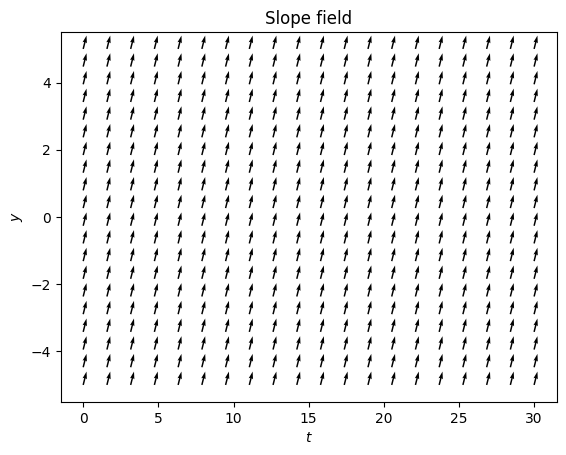

In [ ]:
# we can pass in values using the variables we defined.
plot_function(rhs, r=0.2, N=1, a=0.3, b=1)

### Exercise

Modify the above code, and plot your own slope field, for $r=0.2,\ N=1, a=0.4,\ b=2$.

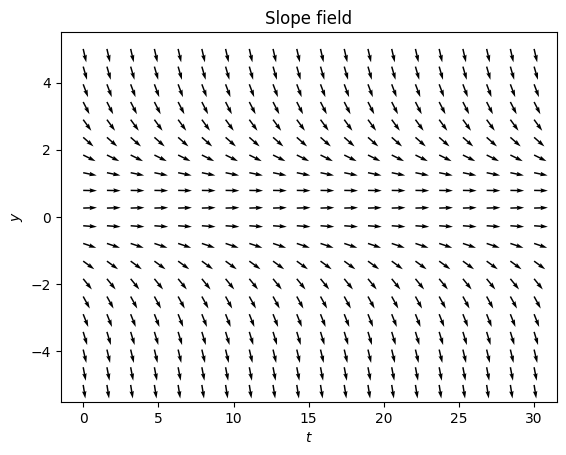

In [ ]:

def rhs(**kwargs):
  # define variables
  y = kwargs.get('y')
  r = kwargs.get('r')
  N = kwargs.get('N')
  b = kwargs.get('b')
  a = kwargs.get('a')
  # we return our numerical function
  return r * y * (1 - y/N) - a * y**2/(b**2 + y**2)

plot_function(rhs, r=0.2, N=1, a=0.4, b=2)

### Exercise

Plot your own slope field, for $dy/dt=y(1-y)(1+y)$. First define your right hand side function

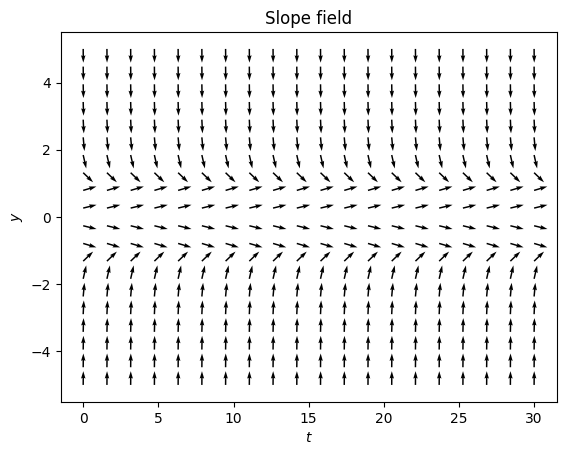

In [ ]:
def rhs(**kwargs):
  # define variables
  y = kwargs.get('y')
  # we return our numerical function
  return y*(1-y)*(1+y)

plot_function(rhs)

##Existence

For $y'=\frac{1}{x}, y(0) = 0$, Notice that the solution does not exist at x=0. We can verify this by plotting the equation after solving it.

> Add blockquote



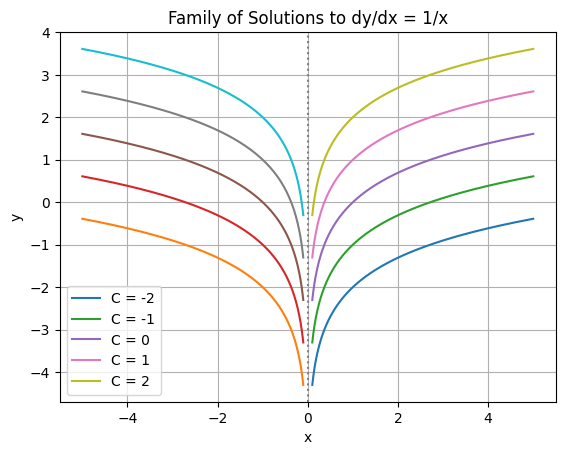

In [ ]:
x = symbols('x')
y = Function('y')(x)
general_solution = dsolve(Eq(y.diff(), 1/x)) # solves y' = 1/x
C1 = symbols('C1')
sol_expr = general_solution.rhs.subs(C1, 0)  # y = log(x) + C_1, for example we replace C_1 with 0.
f = lambda x_vals: np.log(np.abs(x_vals)) # we utilize a lambda function as a way to quickly define a function

x_vals = np.linspace(0.0001, 6, 400)  # avoid x=0 due to discontinuity
y_vals = f(x_vals)


x_pos = np.linspace(0.1, 5, 400)
x_neg = np.linspace(-5, -0.1, 400)

C_values = [-2, -1, 0, 1, 2]

for C in C_values:
    y_pos = np.log(x_pos) + C
    y_neg = np.log(-x_neg) + C
    plt.plot(x_pos, y_pos, label=f'C = {C}')
    plt.plot(x_neg, y_neg, linestyle='solid')

plt.title('Family of Solutions to dy/dx = 1/x')
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(0, color='gray', linestyle=':')  # asymptote at x=0
plt.grid(True)
plt.legend()
plt.show()